For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [ ]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

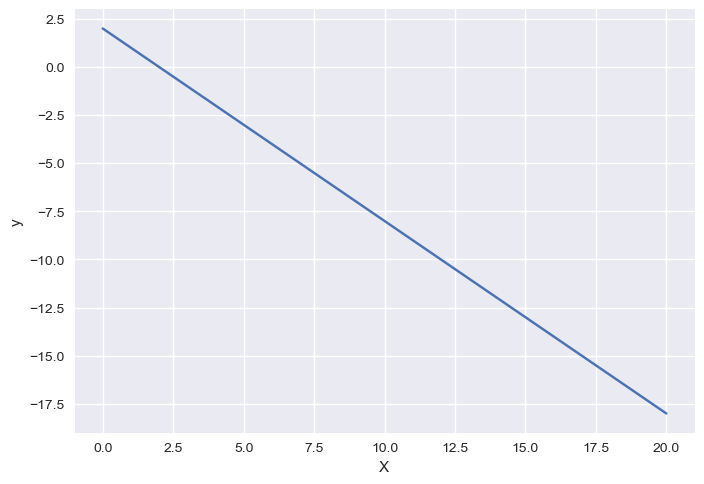

In [ ]:
plt.plot(X,y)
plt.style.use('seaborn')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
def Epoch_loss(loss):
    plt.plot(loss ,'-mo')
    plt.style.use('seaborn')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    

def Thetas_loss(Theta_0,Theta_1,loss,alpha):
    #Theta_0
    plt.plot(Theta_0,loss ,marker ='o',color = 'purple')
    plt.style.use('seaborn')
    plt.xlabel("Theta_0")
    plt.ylabel("Loss")
    plt.title(f"Learing Rate = {alpha}")
    plt.show()
    #Theta_1
    plt.plot(Theta_1,loss ,marker ='o',color = 'purple')
    plt.style.use('seaborn')
    plt.xlabel("Theta_1")
    plt.ylabel("Loss")
    plt.title(f"Learing Rate = {alpha}")
    plt.show()
    
    
def All_lines(X,y,H):
    plt.scatter(X,y,label="y_actual")
    for j in range(0,len(H)):
        plt.plot(X,H[j] ,color='red')

    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()
    
    
def best_Line(X,y,h_x):
    plt.scatter(X,y,label="y_actual")
    plt.plot(X,h_x ,color='red',label="y_predict h(x)")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [ ]:
def Batch_GD(X ,y , alpha ,max_it):
    theta_0 , theta_1 = 0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    
    for i in range(max_it):
        print(f"\n****************** Iteration {i} ********************")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)
        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        
        if i >2 and abs(loss[-1] -loss[-2]) <= 0.001:
                break
    
        if G_norm <= 0.001 :
            break
            
        theta_0 = theta_0 - alpha * d_theta_0 
        theta_1 = theta_1 - alpha * d_theta_1 
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
        
    # ****************** Training Report ********************
    print("\n****************** Training Report ********************")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()    
        
    return Theta_0, Theta_1 , H ,  loss
    


#### Try your function with any input parameterss of your choice.

In [ ]:
Theta_0, Theta_1, H, loss= Batch_GD(X ,y , 0.001 ,500)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.008
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.9688589407729974

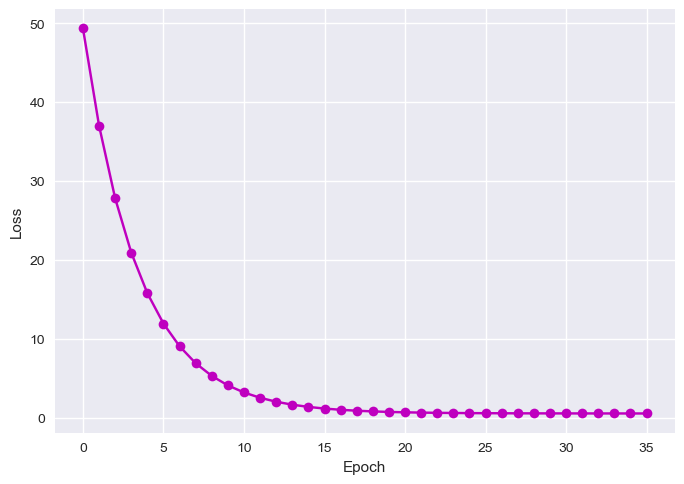

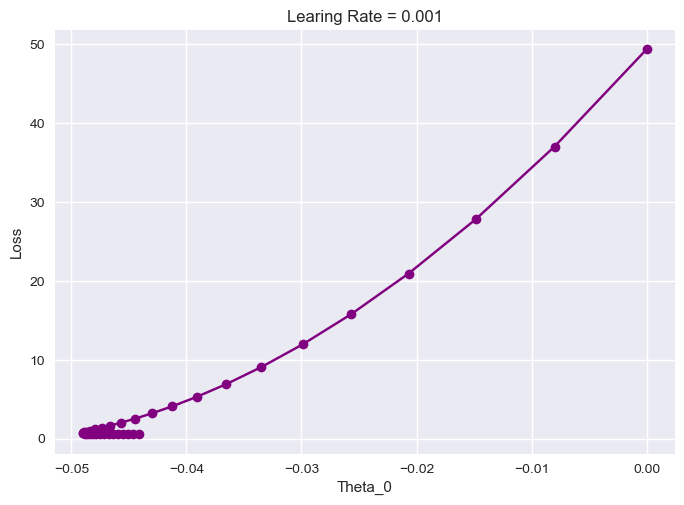

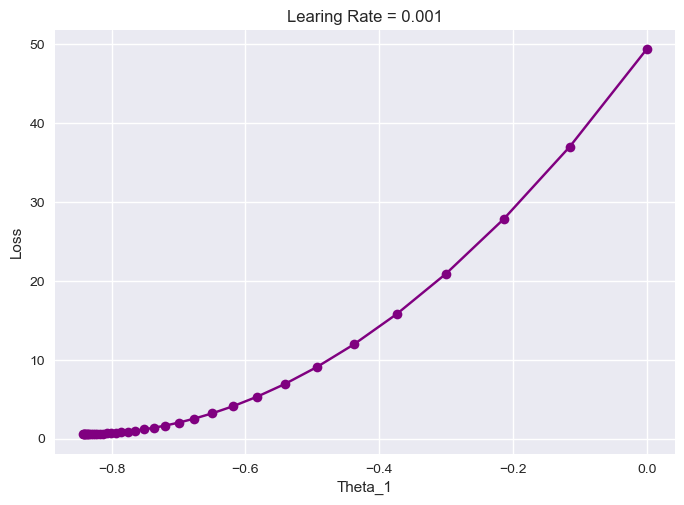

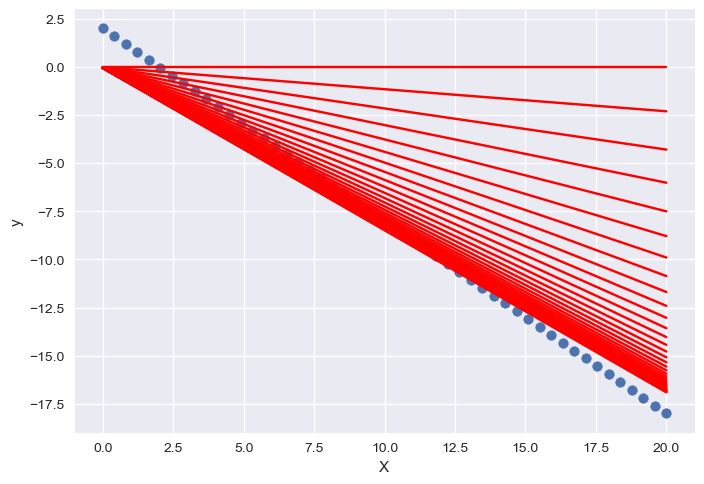

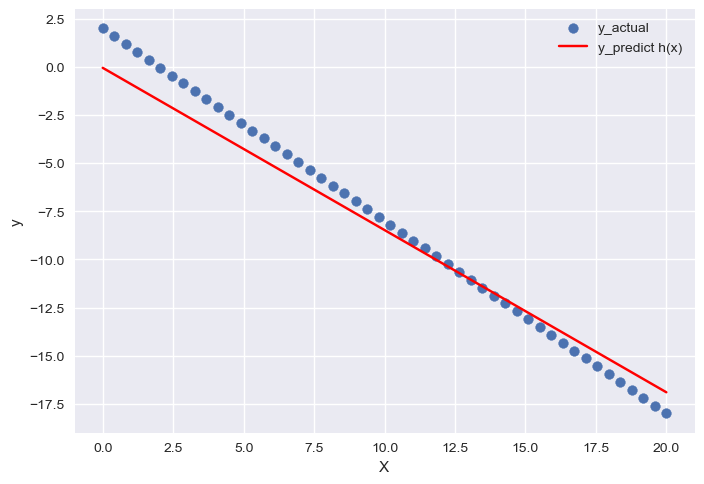

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,0.001)
All_lines(X,y,H)
best_Line(X,y,H[-1])

In [ ]:
Theta_0, Theta_1, H, loss= Batch_GD(X ,y , 0.005 ,500)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.04
theta_1_new :  -0.5

In [ ]:
r2_score(y,H[-1])

0.9775884119071931

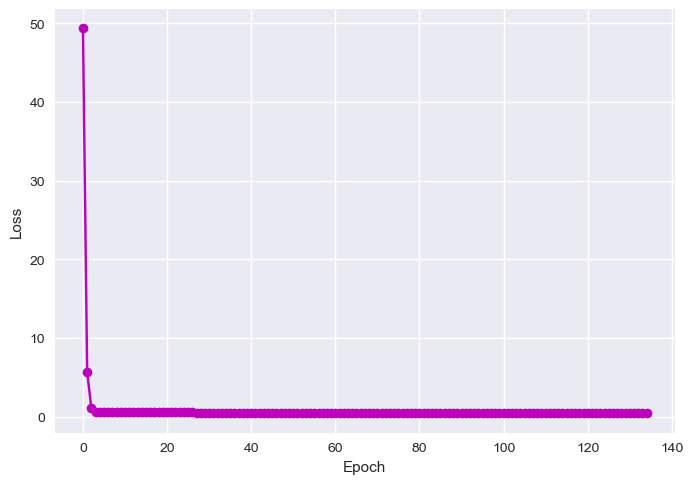

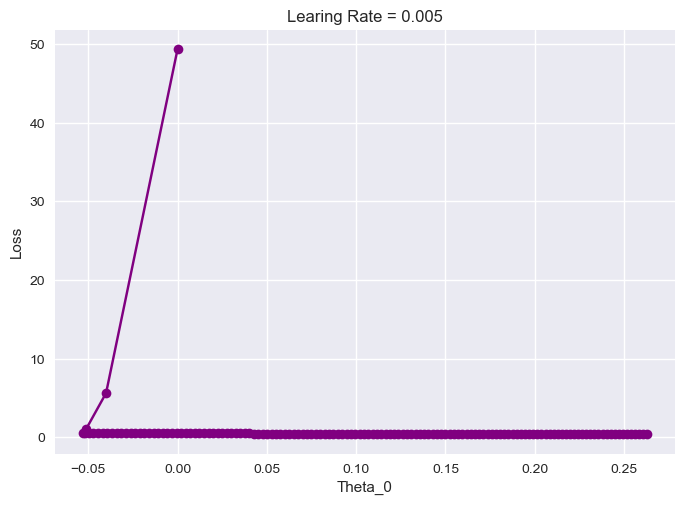

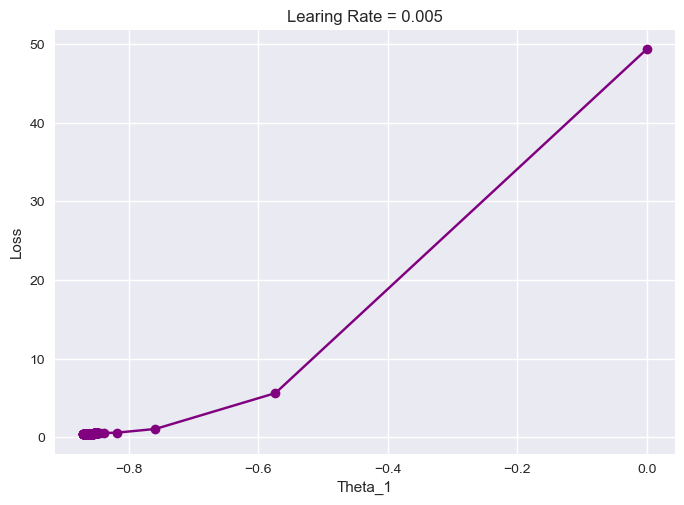

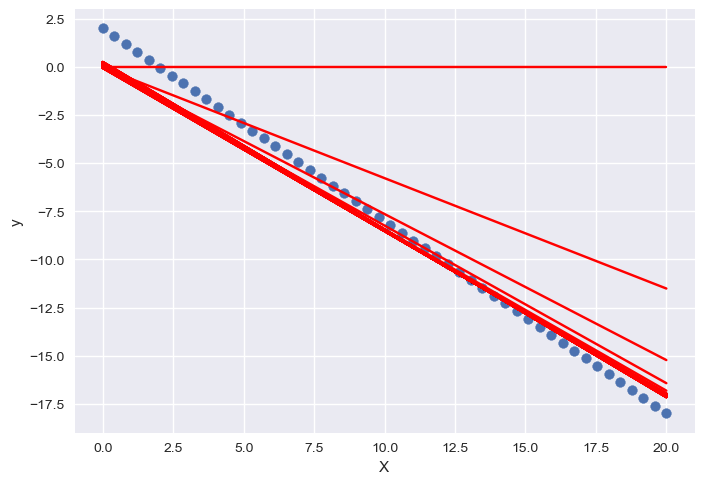

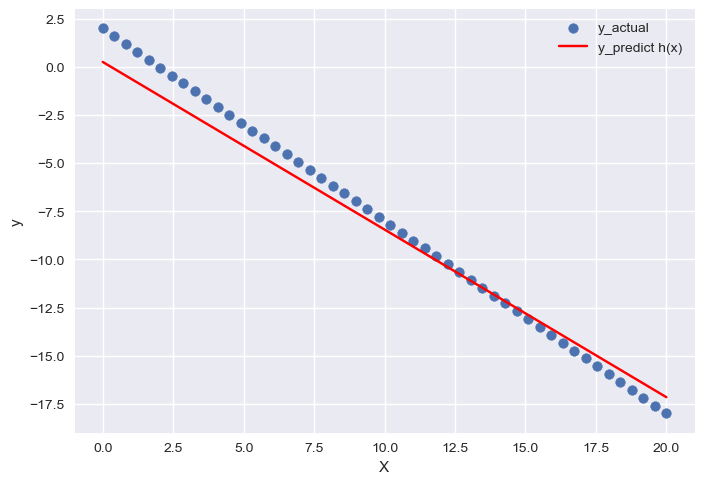

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,0.005)
All_lines(X,y,H)
best_Line(X,y,H[-1])

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [ ]:
Theta_0, Theta_1, H, loss= Batch_GD(X ,y , 0.0005 ,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.9686158031920962

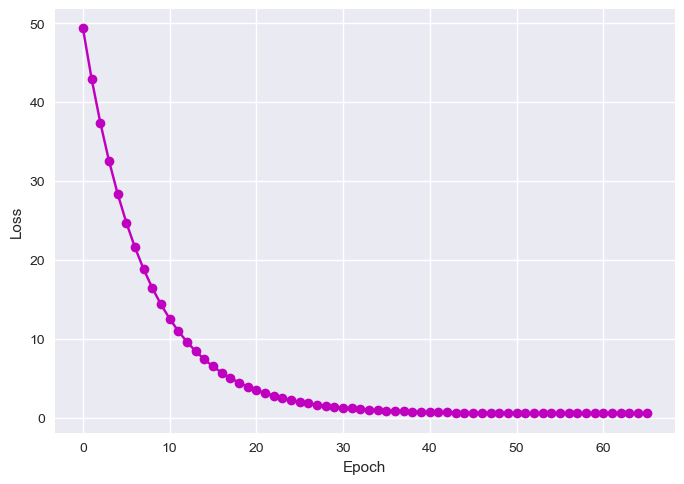

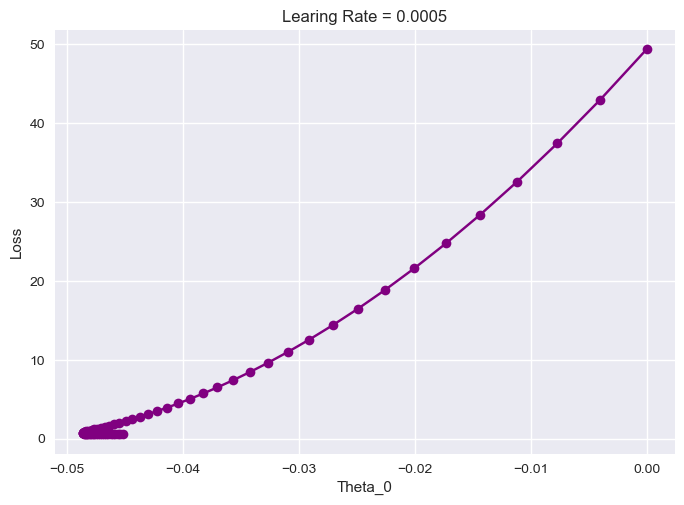

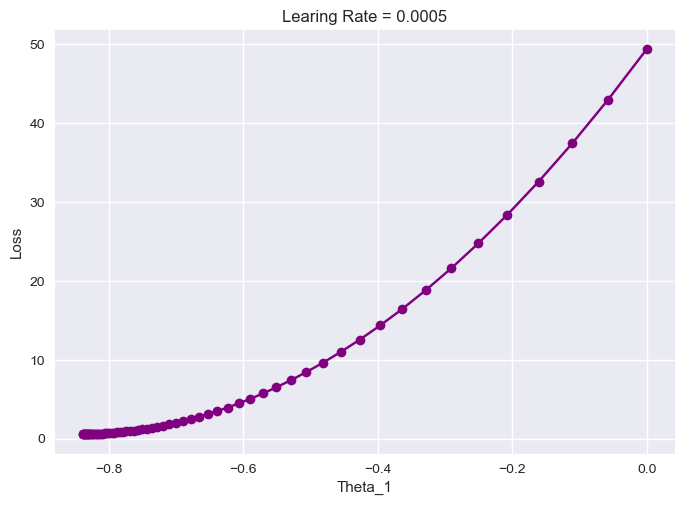

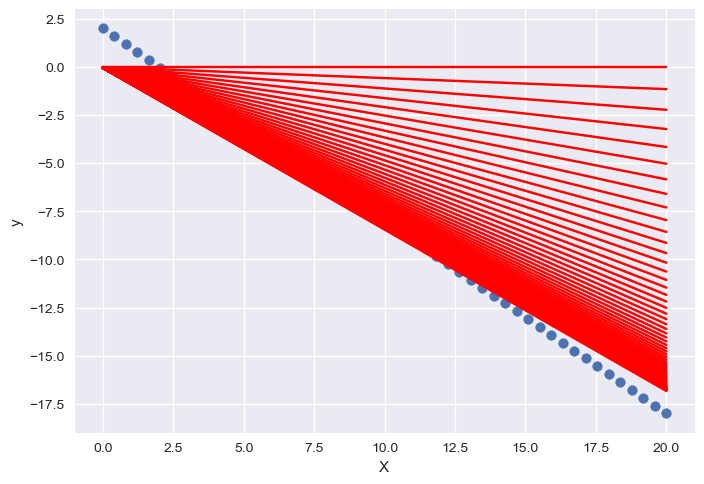

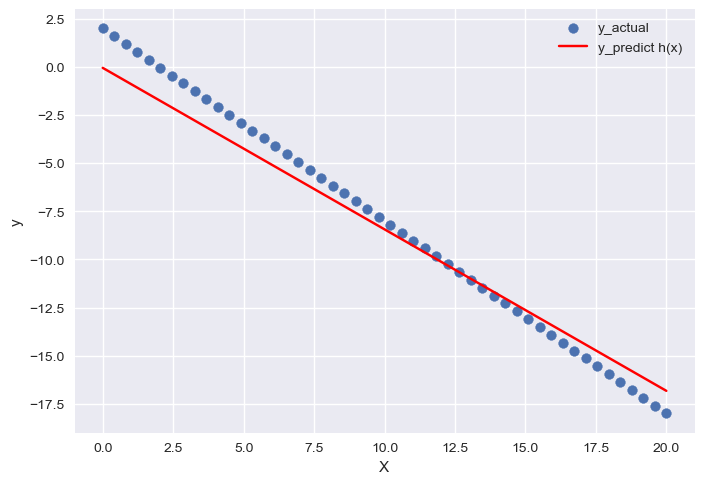

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,0.0005)
All_lines(X,y,H)
best_Line(X,y,H[-1])

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

In [ ]:
def Momentum_GD(X ,y , alpha , gamma ,max_it):
    theta_0 , theta_1 , V_0 ,V_1 = 0,0,0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    
    for i in range(max_it):
        print(f"\n****************** Iteration {i} ********************")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)
        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        
        if i >2 and abs(loss[-1] -loss[-2]) <= 0.001:
                break
    
        if G_norm <= 0.001 :
            break
        
        V_0 = (gamma*V_0) + (alpha * d_theta_0) 
        theta_0 = theta_0 - V_0
        
        V_1 = (gamma*V_1) + (alpha * d_theta_1)
        theta_1 = theta_1 - V_1
        
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
        
    # ****************** Training Report ********************
    print("\n****************** Training Report ********************")
    print(f"\nGradient Descent converged after {i+1} iterations")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()    
        
    return Theta_0, Theta_1 , H ,  loss
    


#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [ ]:
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.0005,0.5,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.9687892837396442

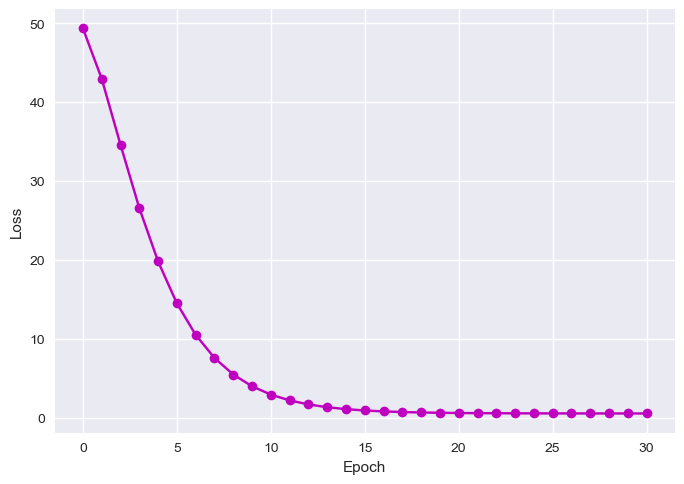

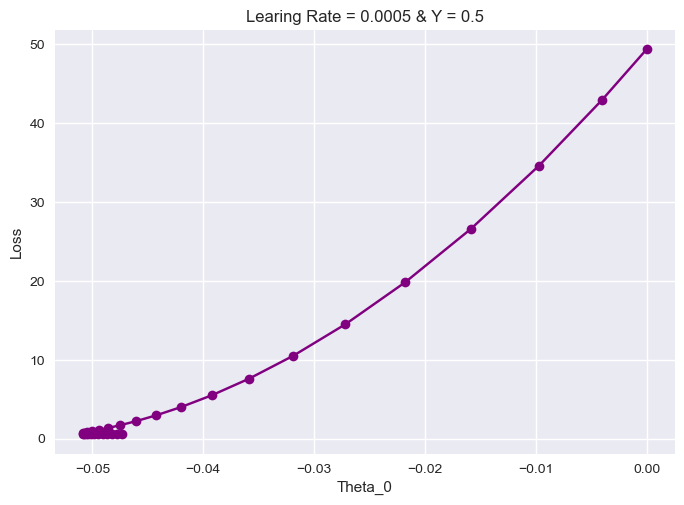

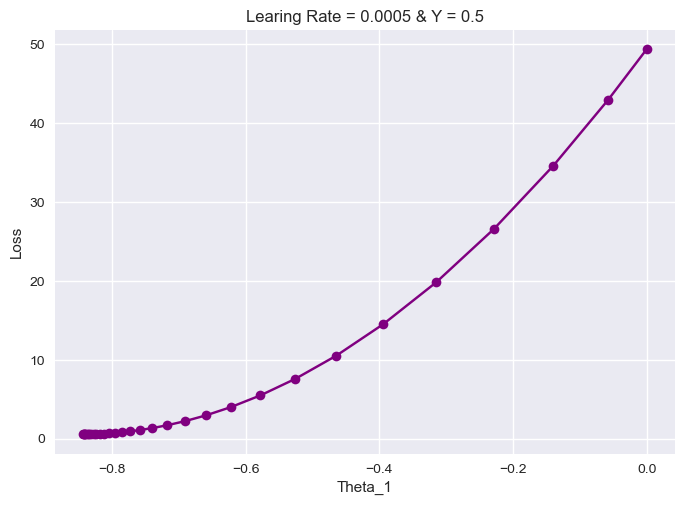

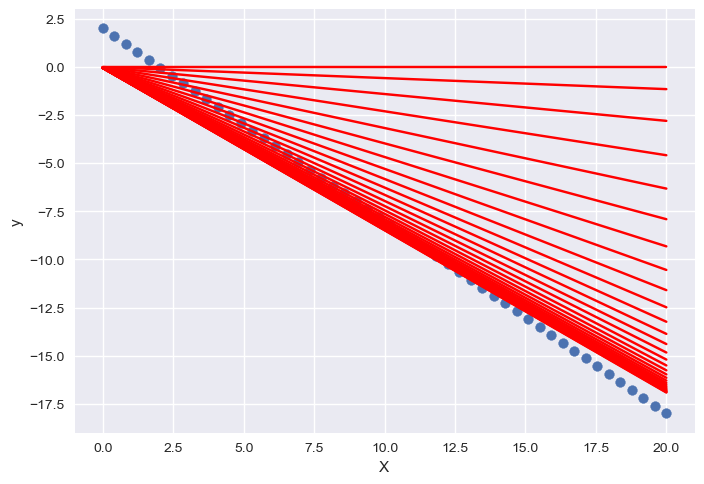

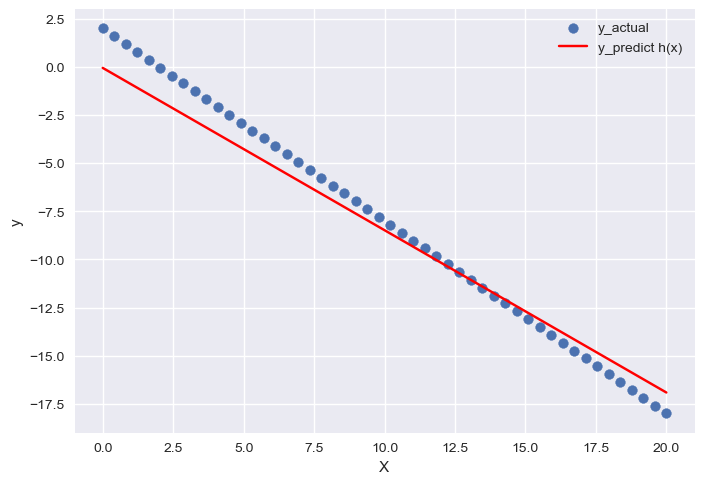

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y = 0.5')
All_lines(X,y,H)
best_Line(X,y,H[-1])

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 

In [ ]:
#when Y is very large the model overshot and converge after more iteration
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.0005,0.999,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1]) #the line updated in the opposite direction

-0.8769742766633166

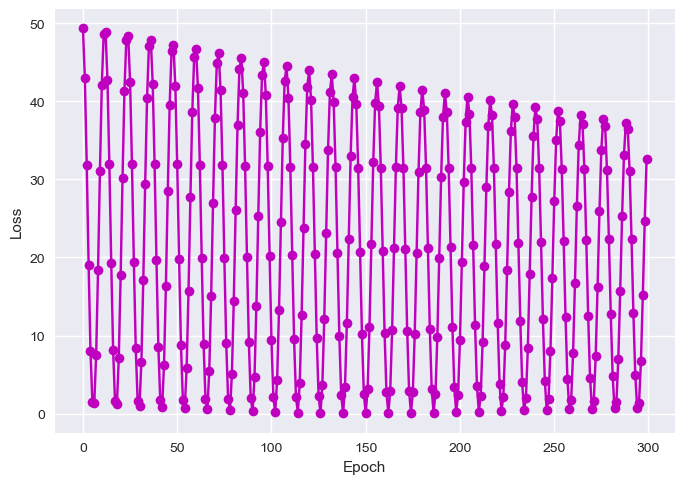

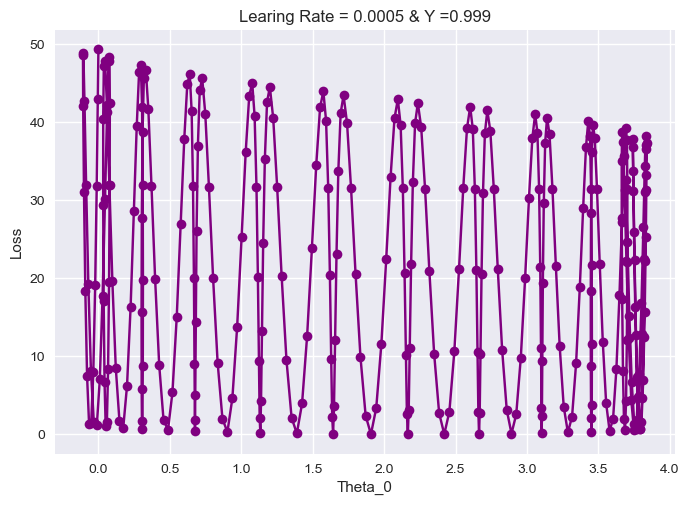

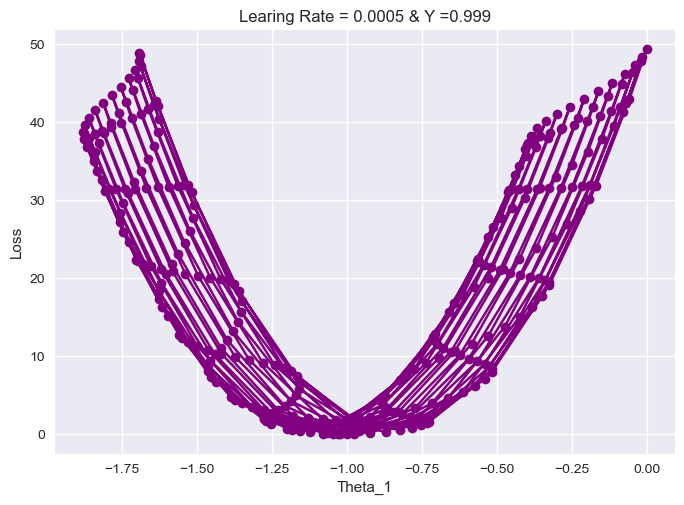

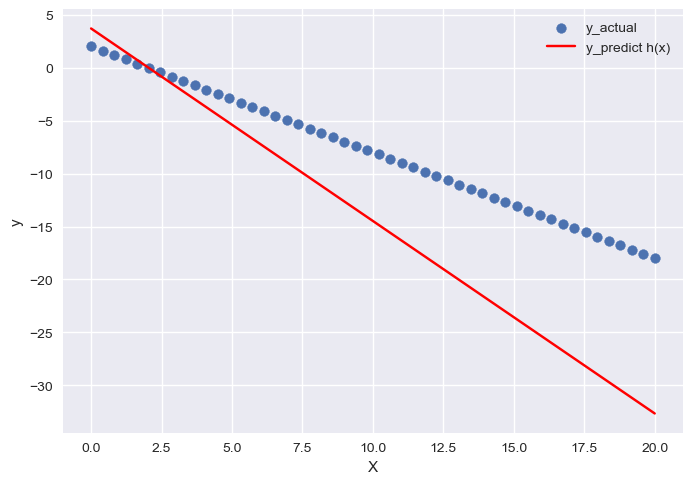

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.999')

best_Line(X,y,H[-1])

In [ ]:
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.0005,0.99,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.86396123076074

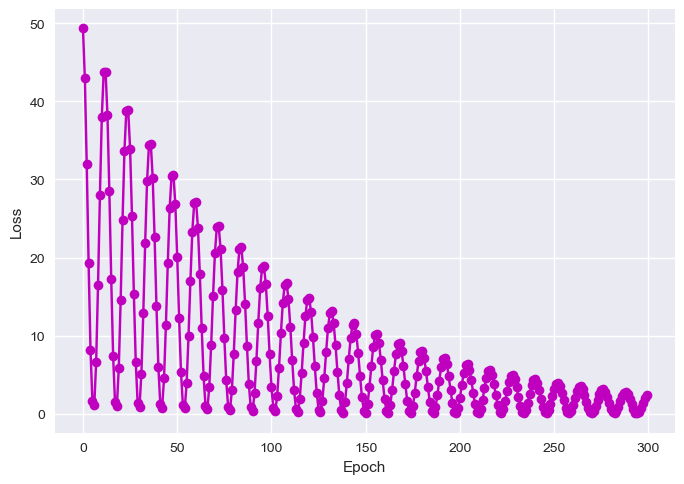

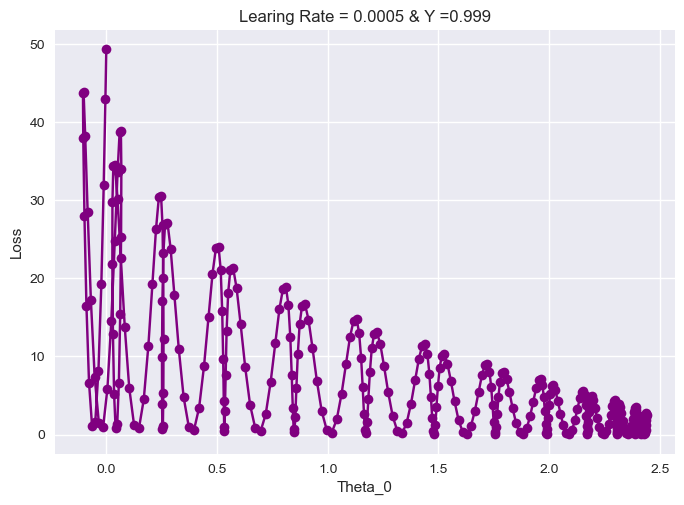

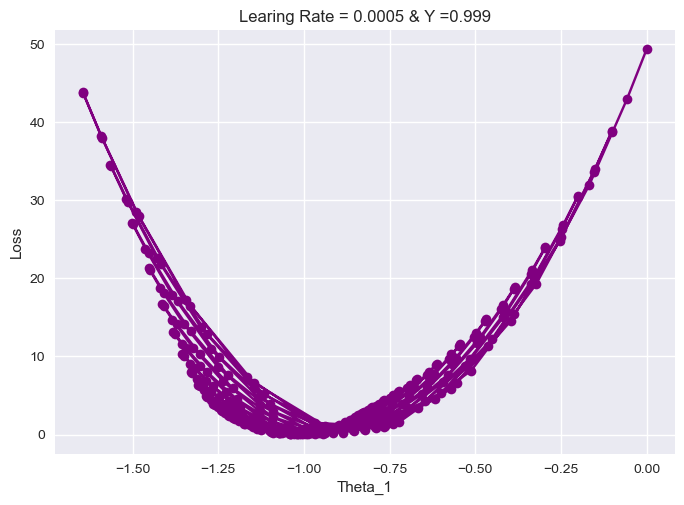

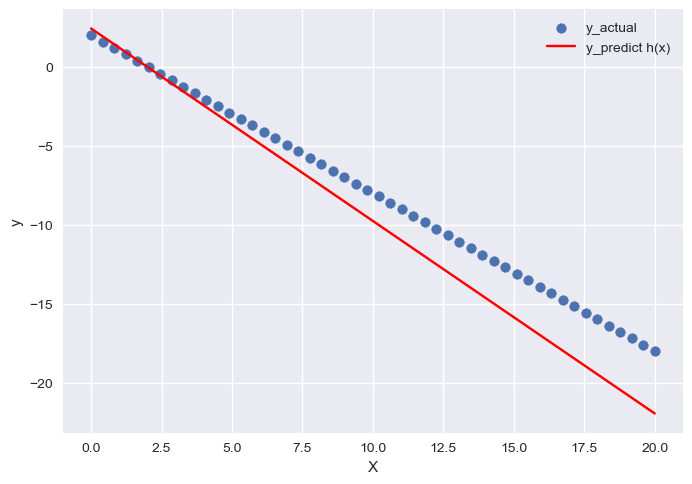

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.99')

best_Line(X,y,H[-1])

In [ ]:
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.0005,0.001,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.9686193854917515

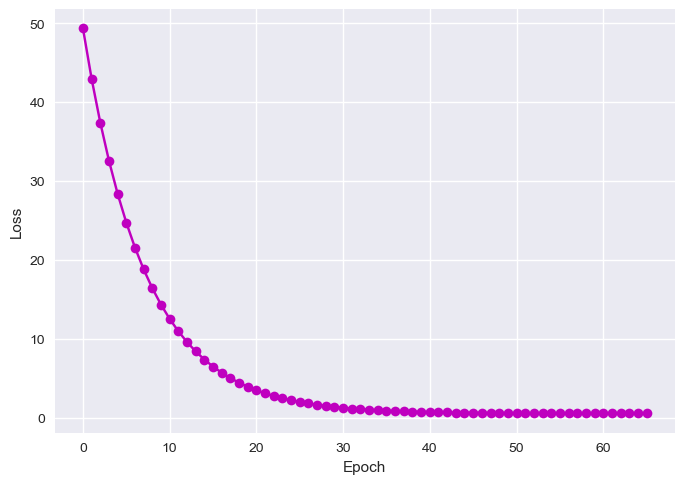

In [ ]:
Epoch_loss(loss)

#### Try momentum = 0

In [ ]:
#momentum = 0
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.005,0,300)
#The same like Batch GD algorithm


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.04
theta_1_new :  -0.5

In [ ]:
r2_score(y,H[-1])

0.9775884119071931

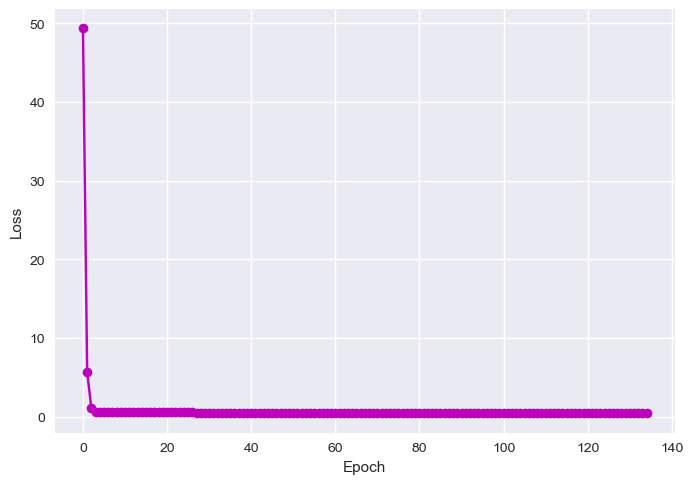

In [ ]:
Epoch_loss(loss)

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.0005,0.9,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.973589591111118

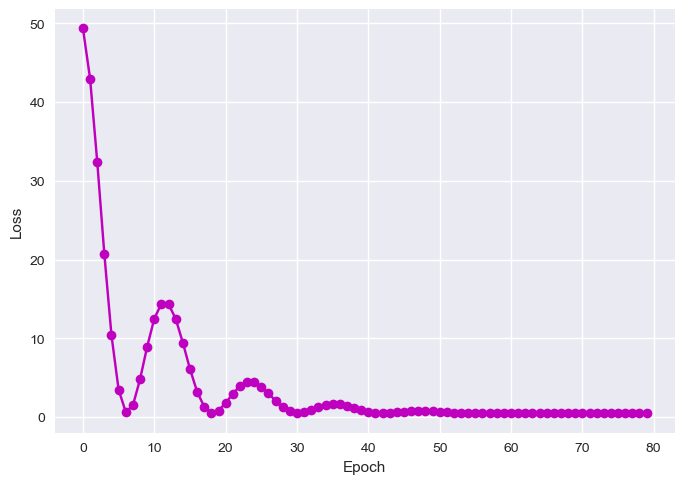

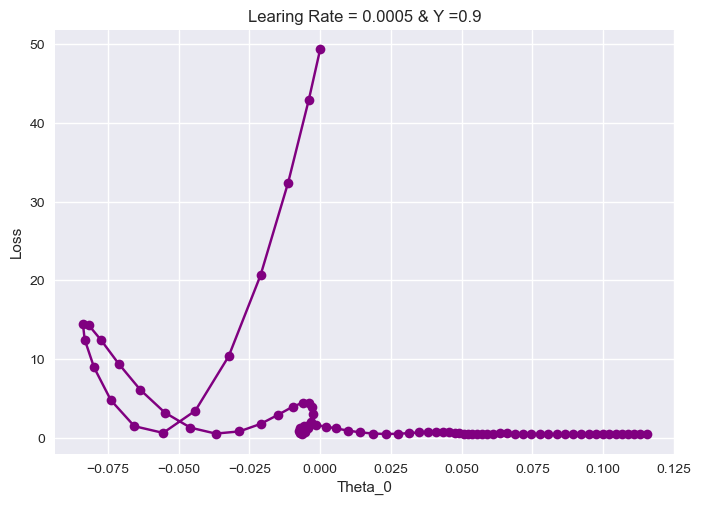

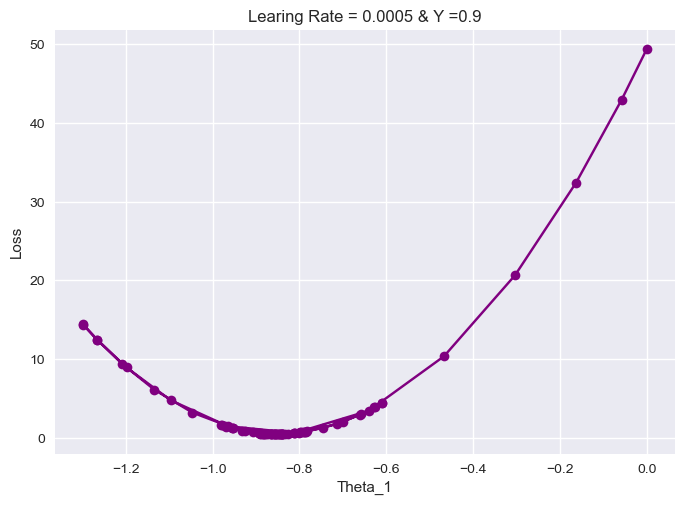

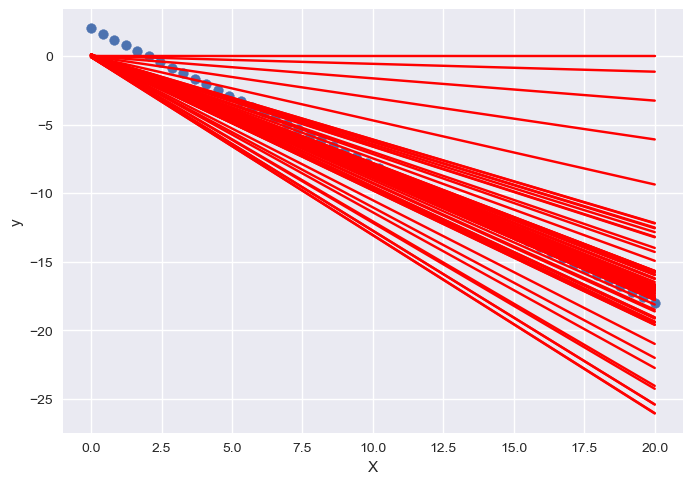

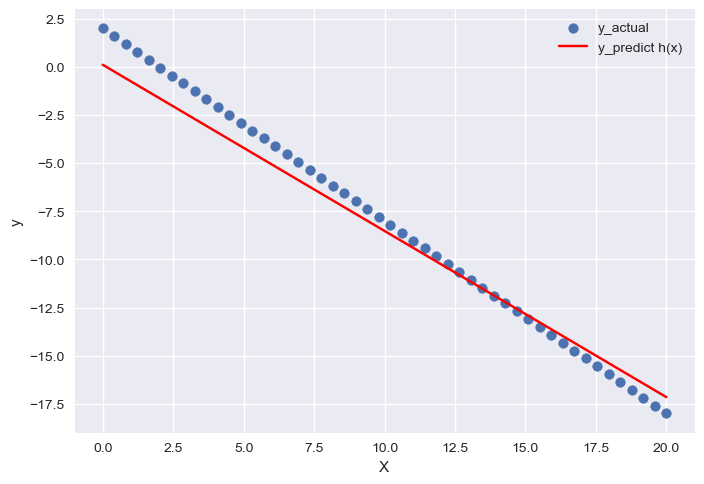

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.9')
All_lines(X,y,H)
best_Line(X,y,H[-1])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.0005,0.89,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

r2_score 0.972435565060376


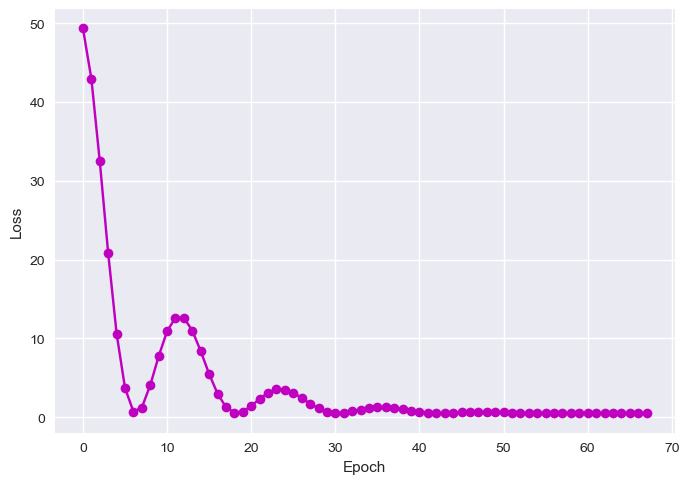

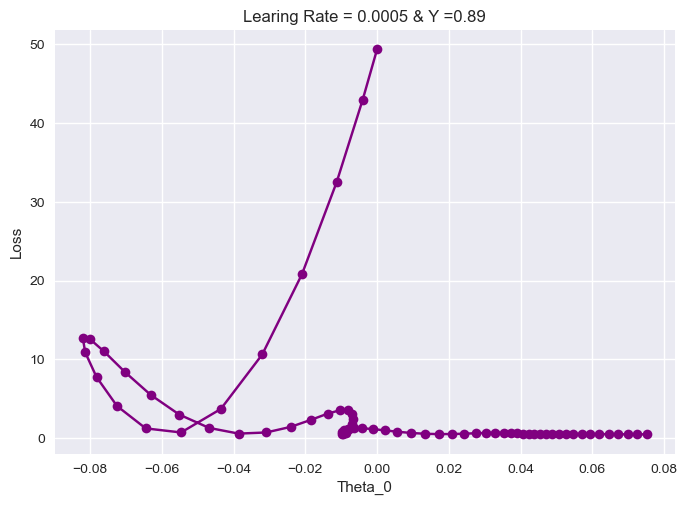

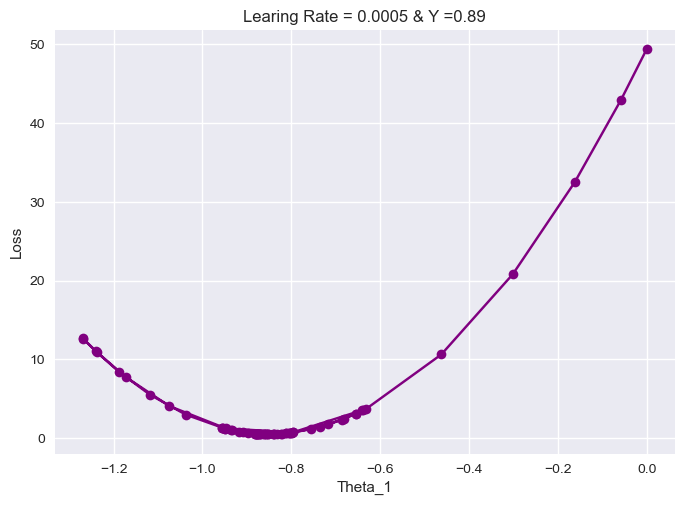

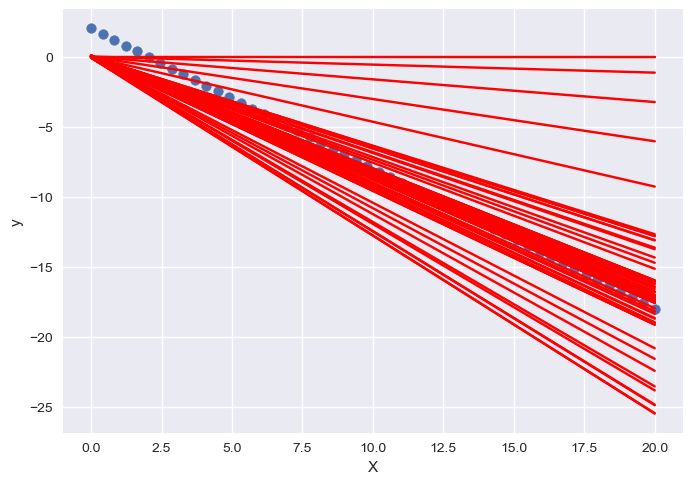

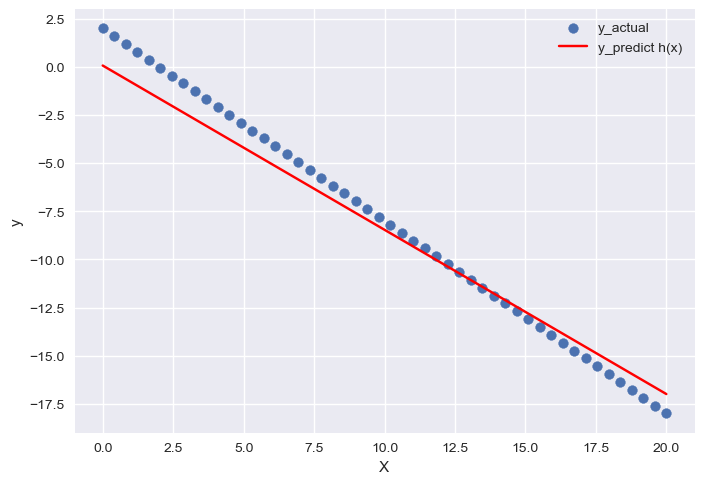

In [ ]:
print("r2_score",r2_score(y,H[-1]))
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.89')
All_lines(X,y,H)
best_Line(X,y,H[-1])

#### Try momentum = 0

In [ ]:
Theta_0, Theta_1 , H ,  loss = Momentum_GD(X,y,0.01,0.9,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.08
theta_1_new :  -1.1

In [ ]:
r2_score(y,H[-1]) #best score

0.9998979226597318

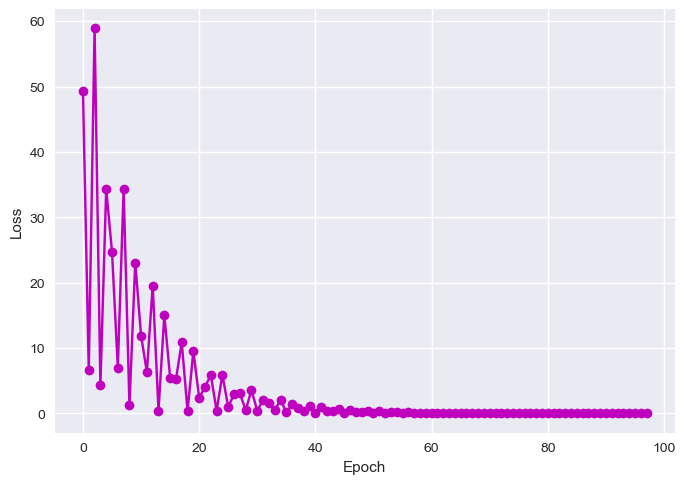

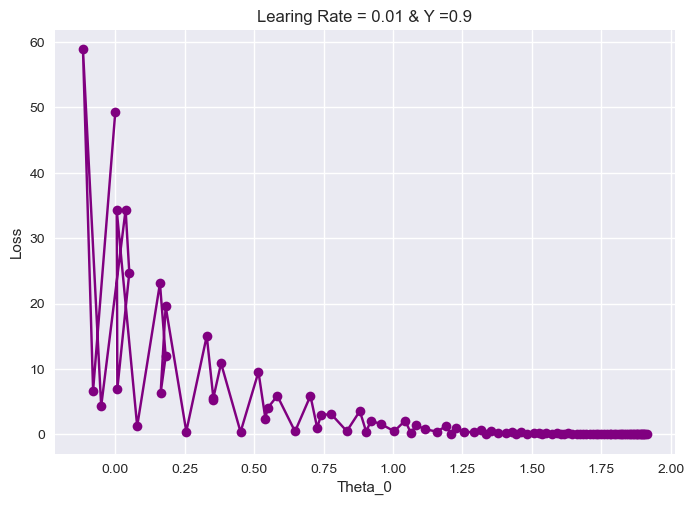

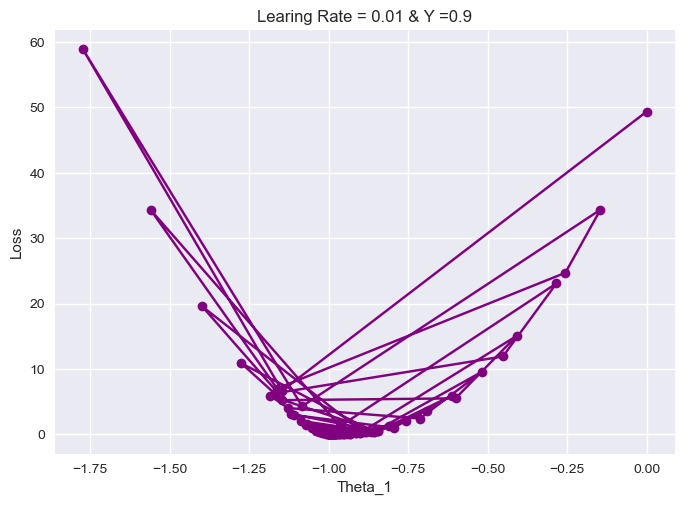

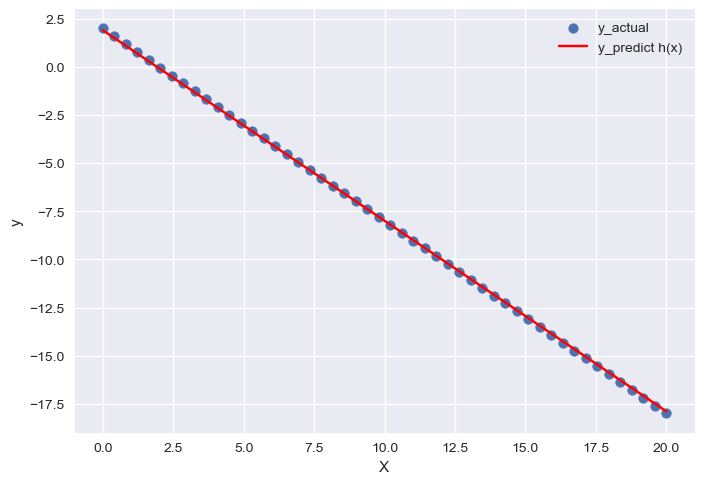

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.01 & Y =0.9')
best_Line(X,y,H[-1])

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [ ]:
# theta0_temp = theta_0 - (gamma * V_0 )
# theta1_temp = theta_1 - (gamma * V_1 )

# h_temp = theta0_temp + theta1_temp * X
# err_temp = h_temp - y
# d_theta0_temp=  1/len(X) * sum((err_temp))
# d_theta1_temp=  1/len(X) * sum((err_temp)*X)

# theta_0 = theta_temp - (alpha *d_theta0_temp)
# theta_1 = theta_temp - (alpha *d_theta1_temp)

# V_0 = (gamma*V_0) + (alpha * d_theta0_temp) 
# V_1 = (gamma*V_1) + (alpha * d_theta1_temp) 


In [ ]:
def NAG(X ,y , alpha , gamma ,max_it):
    theta_0 , theta_1 , V_0 ,V_1 = 0,0,0,0
    loss=[]
    Theta_0=[]
    Theta_1=[]
    H =[]
    
    for i in range(max_it):
        print(f"\n****************** Iteration {i} ********************")
        Theta_0.append(theta_0)
        Theta_1.append(theta_1)
        h_x = theta_0 + theta_1 * X
        H.append(h_x)
        print("h(x):" ,h_x)
        err=(h_x - y)
        m_2 = 2*len(X)
        j = 1/m_2 * sum(err**2)
        loss.append(j)
        print("\nError Vector:\n" , err)
        print("\nj = " ,j)
        d_theta_0=  1/len(X) * sum((err))
        d_theta_1= 1/len(X) * sum((err)* X)
        G_V= np.array([[d_theta_0],
                       [d_theta_1]])
        print("\nGradient Vector :\n",G_V)
        G_norm = np.linalg.norm(G_V)
        print("\nGradient Vector Norm :\n",G_norm)
        
        
        
        if i >2 and abs(loss[-1] -loss[-2]) <= 0.001:
                break
    
        if G_norm <= 0.001 :
            break
            
        
        theta0_temp = theta_0 - (gamma * V_0 )
        theta1_temp = theta_1 - (gamma * V_1 )

        h_temp = theta0_temp + theta1_temp * X
        err_temp = h_temp - y
        d_theta0_temp=  1/len(X) * sum((err_temp))
        d_theta1_temp=  1/len(X) * sum((err_temp)*X)

        theta_0 = theta0_temp - (alpha *d_theta0_temp)
        theta_1 = theta1_temp - (alpha *d_theta1_temp)

        V_0 = (gamma*V_0) + (alpha * d_theta0_temp) 
        V_1 = (gamma*V_1) + (alpha * d_theta1_temp) 

        
        print("\ntheta_0_new : ",theta_0)
        print("theta_1_new : ",theta_1)
        
        print("\nV_0 : ",V_0)
        print("V_1 : ",V_1)
        
    # ****************** Training Report ********************
    print("\n****************** Training Report ********************")
    print(f"\nGradient Descent converged after {i+1} Epoch")
    print("\ntheta_0_Opt : " ,theta_0)
    print("theta_1_Opt : " ,theta_1)
    print("\nError Vector: ",err)
    print("\ncost : ",j)
    print("\nh(x) = y_predict: \n" ,h_x)
    print("\ny_actual:\n" , y)
    print()    
        
    return Theta_0, Theta_1 , H ,  loss
    


##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
Theta_0, Theta_1 , H ,  loss = NAG(X,y,0.0005, 0.9 ,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.971103130756324

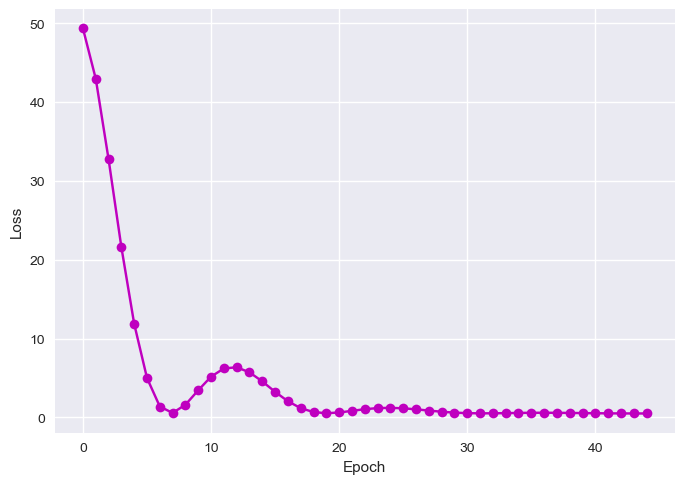

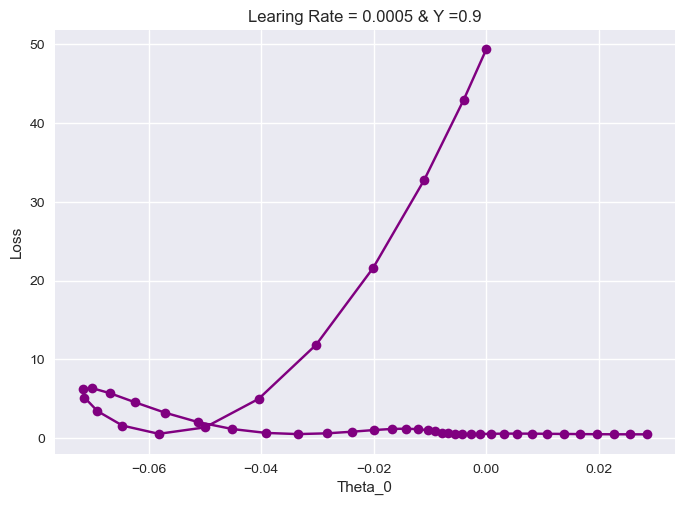

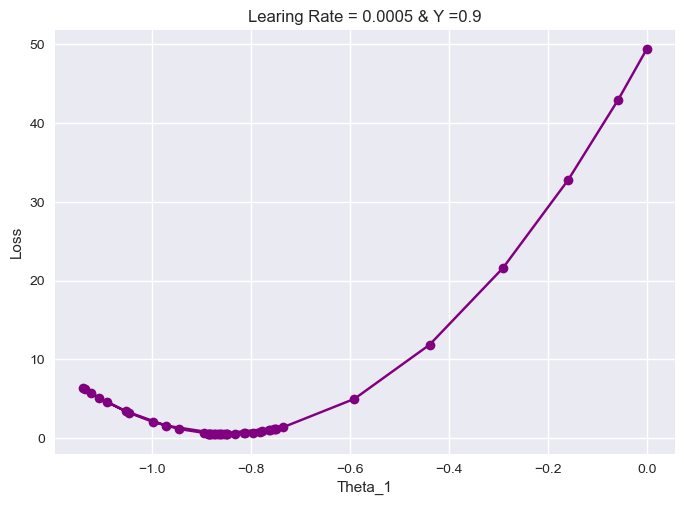

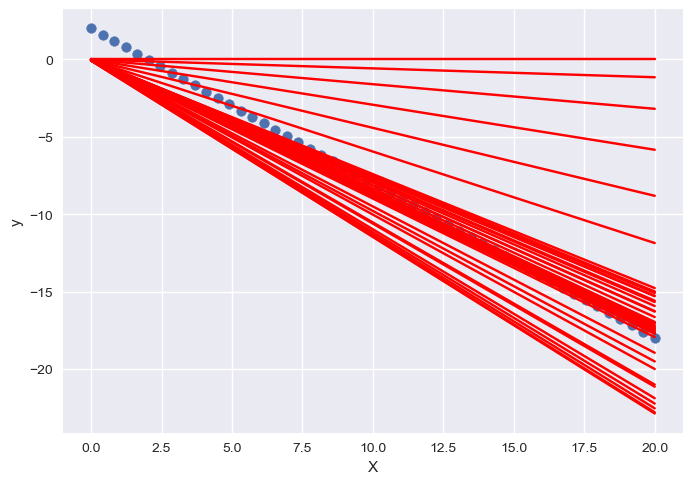

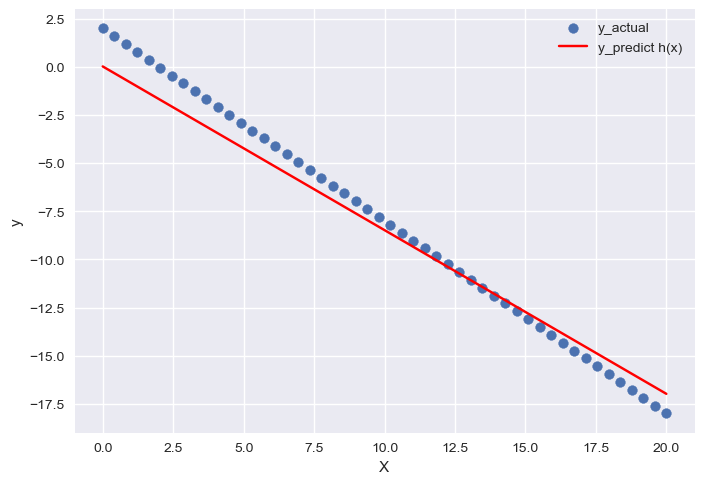

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.9')
All_lines(X,y,H)
best_Line(X,y,H[-1])

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [ ]:
Theta_0, Theta_1 , H ,  loss = NAG(X,y,0.0005, 0.9 ,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.971103130756324

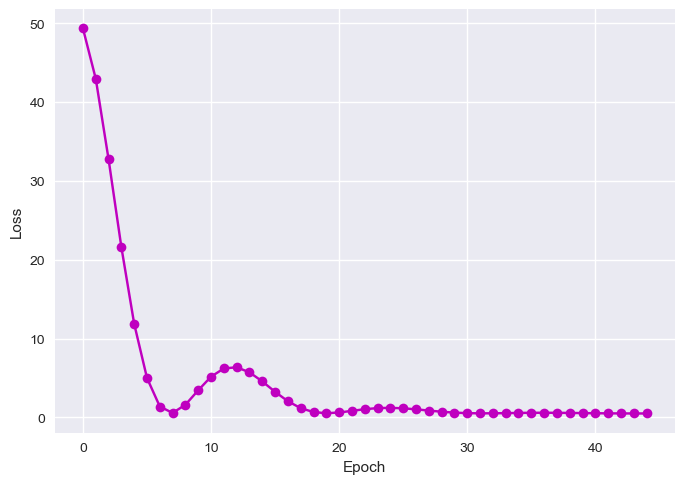

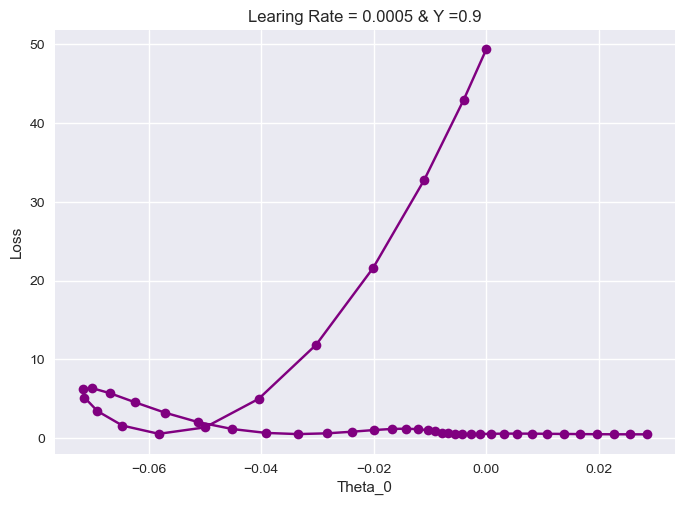

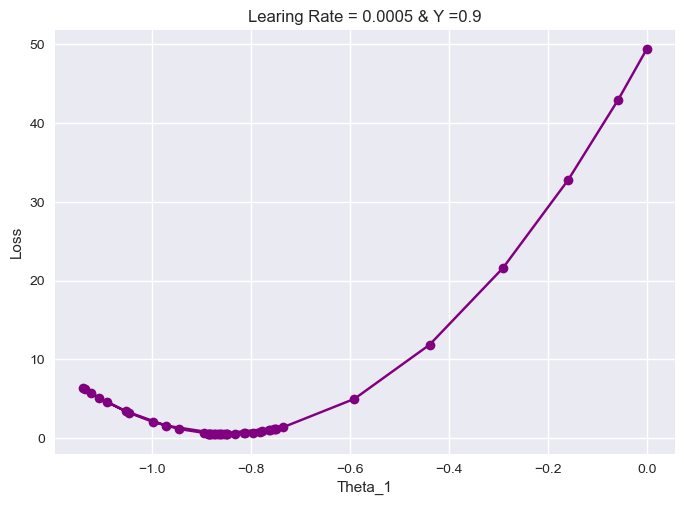

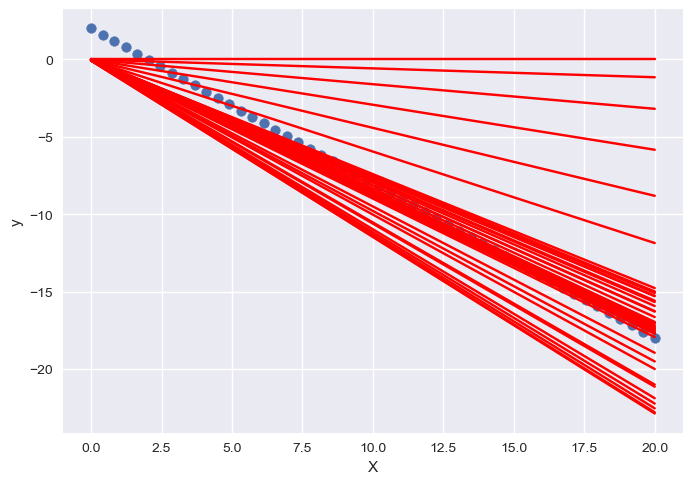

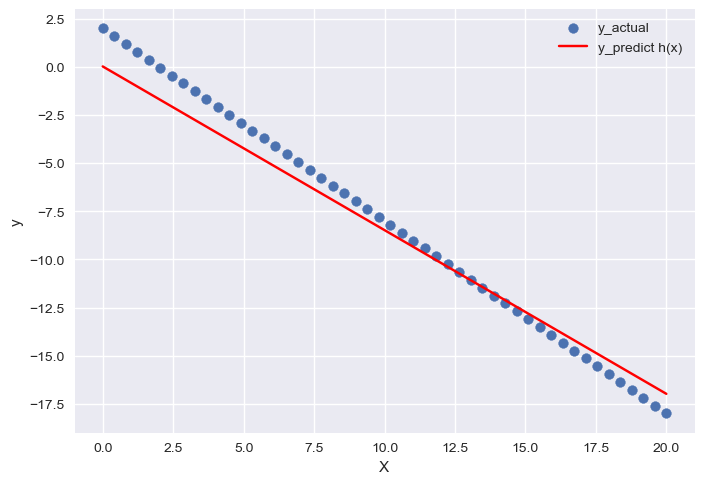

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.9')
All_lines(X,y,H)
best_Line(X,y,H[-1])

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [ ]:
Theta_0, Theta_1 , H ,  loss = NAG(X,y,0.0005, 0.89 ,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.9699718983158406

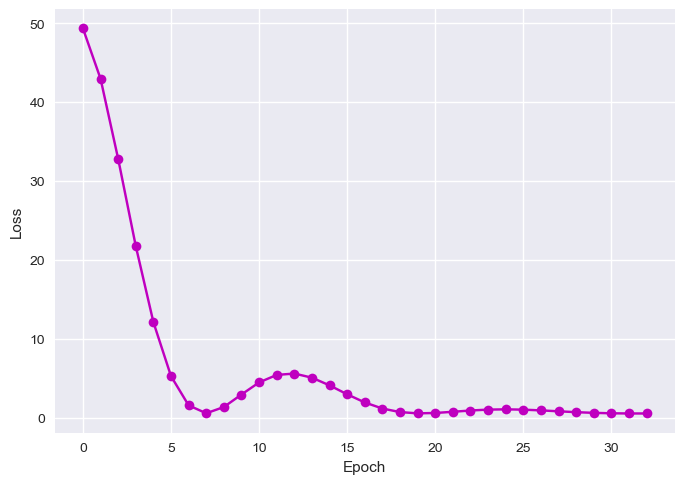

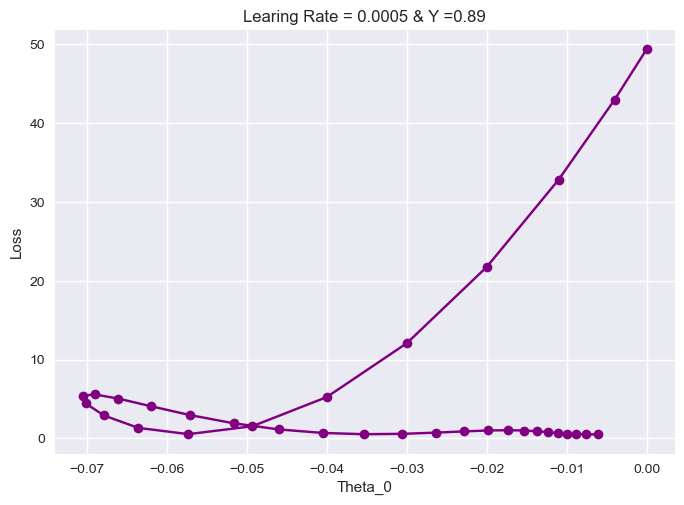

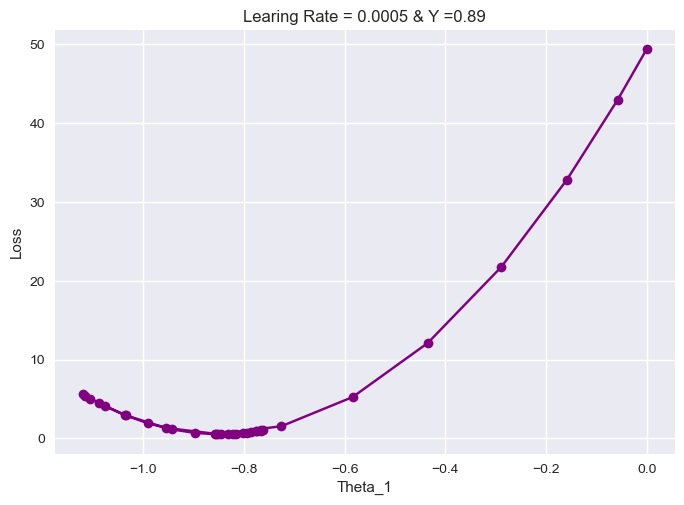

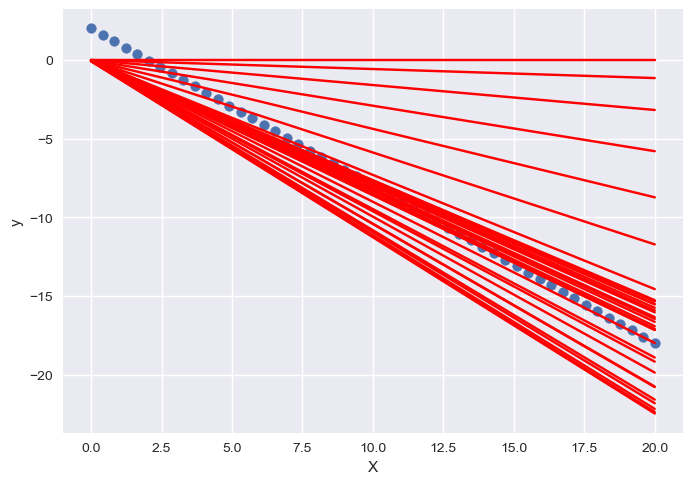

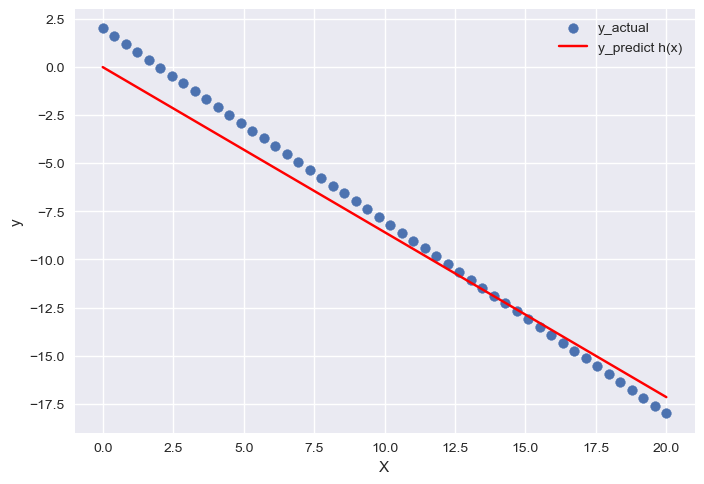

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.89')
All_lines(X,y,H)
best_Line(X,y,H[-1])

In [ ]:
Theta_0, Theta_1 , H ,  loss = NAG(X,y,0.0005, 0.999 ,300)


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.004
theta_1_new :  -0.

In [ ]:
r2_score(y,H[-1])

0.9943631807071626

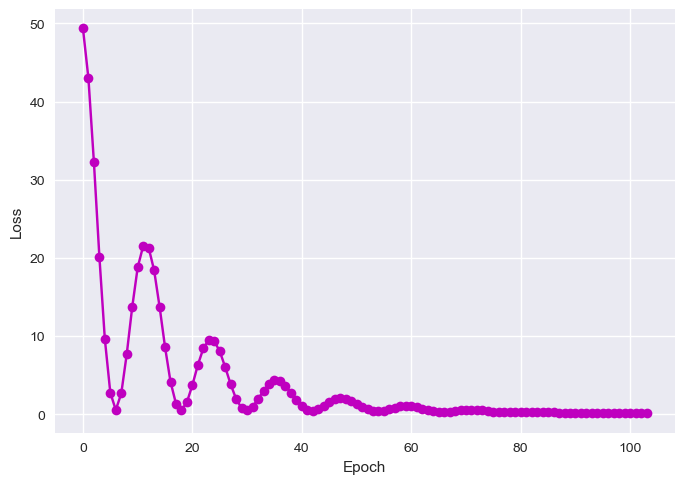

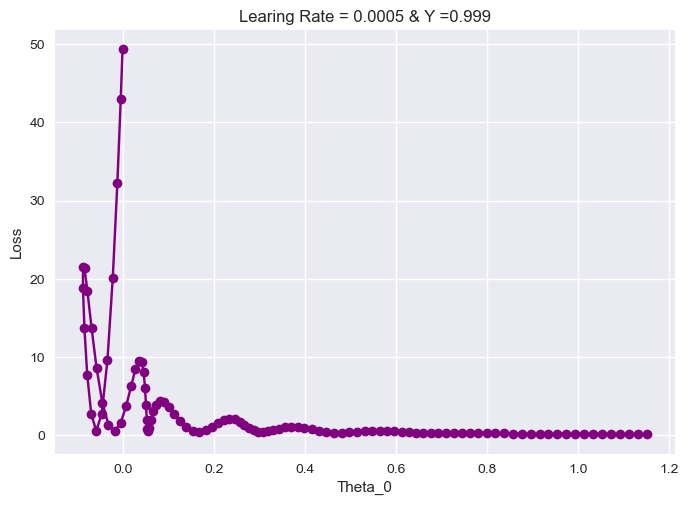

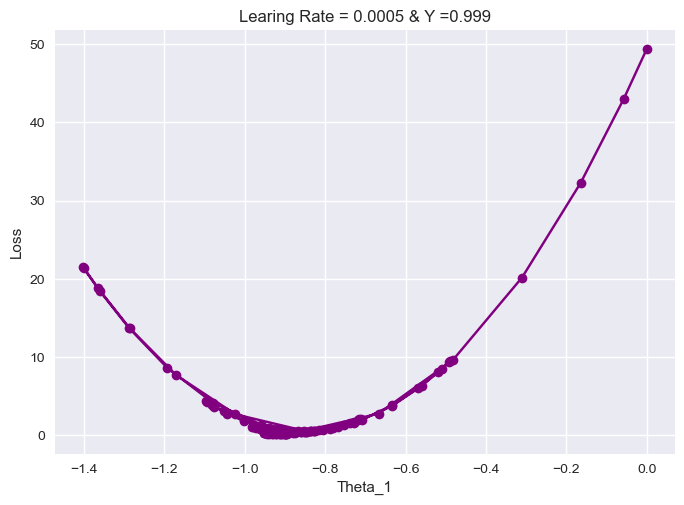

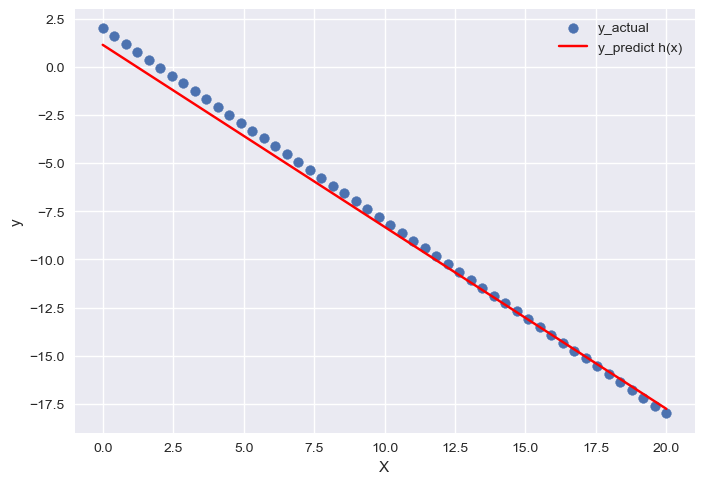

In [ ]:
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.0005 & Y =0.999')
best_Line(X,y,H[-1])

In [ ]:
##gamma=0
Theta_0, Theta_1 , H ,  loss = NAG(X,y,0.005, 0 ,300) #NAG ==> Batch


****************** Iteration 0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
 [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j =  49.34693877551021

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm :
 114.97254258164628

theta_0_new :  -0.04
theta_1_new :  -0.5

r2_score : 0.9775884119071931


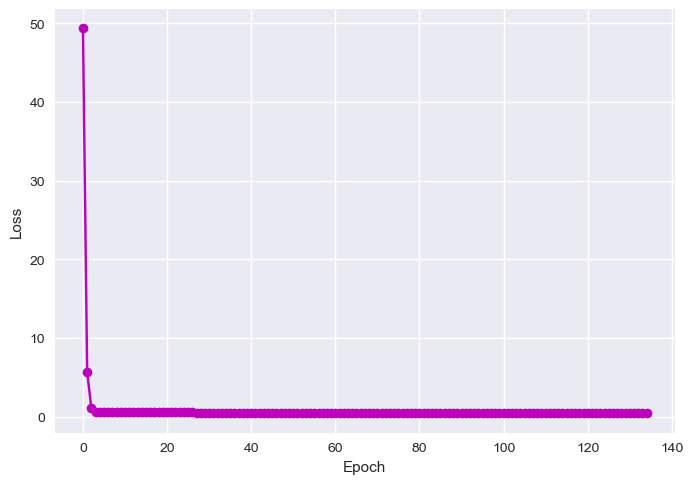

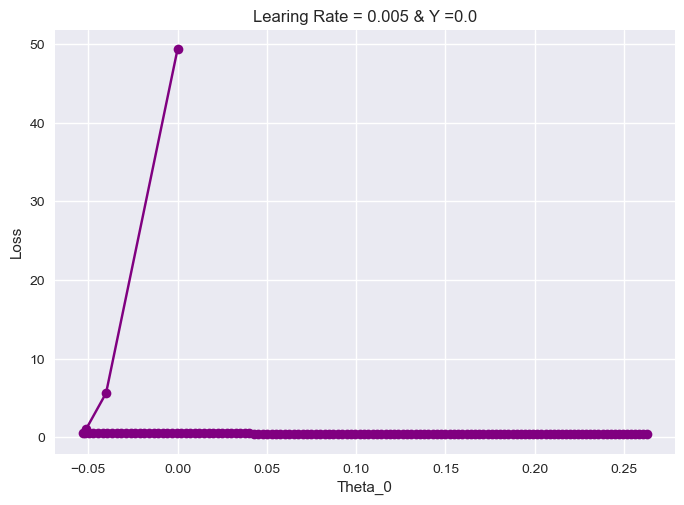

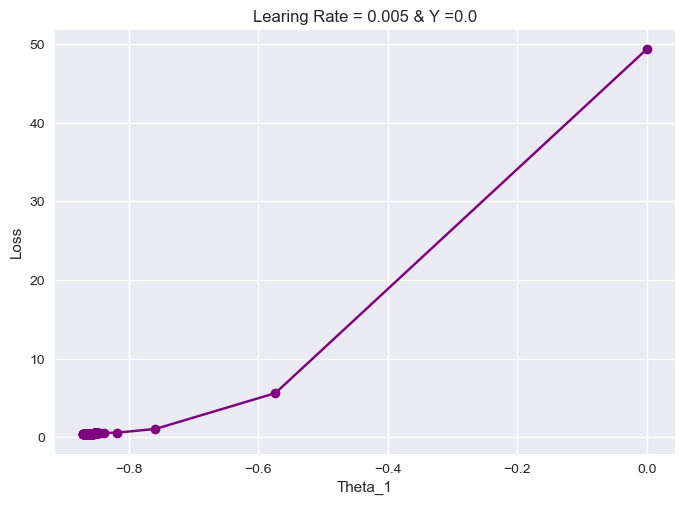

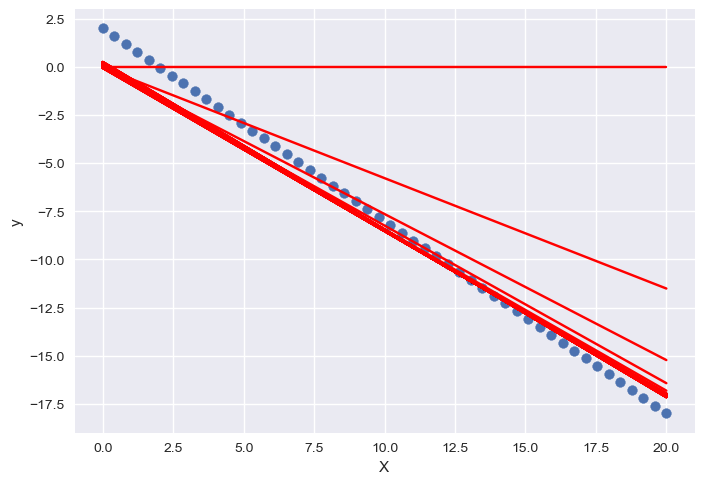

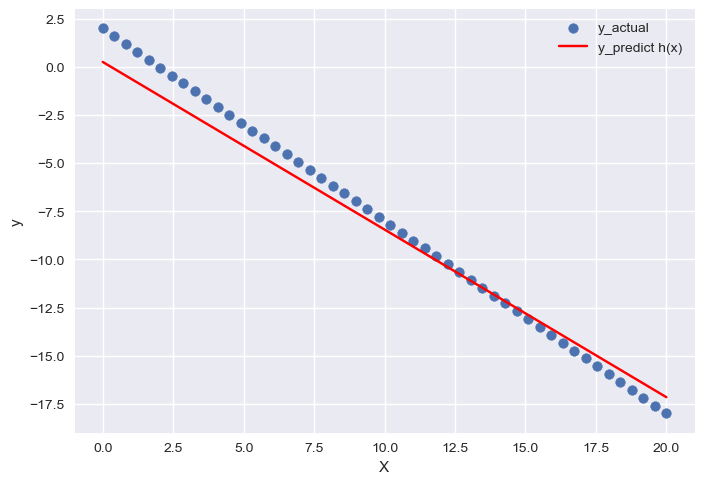

In [ ]:
print("r2_score :" ,r2_score(y,H[-1]))
Epoch_loss(loss)
Thetas_loss(Theta_0,Theta_1,loss,'0.005 & Y =0.0')
All_lines(X,y,H)
best_Line(X,y,H[-1])